In [80]:
import pandas as pd
jr = pd.read_excel("C:\\Users\\dell\\demo\\用python做舆情时间序列可视化\\jingritoutiao.xlsx")

In [81]:
jr.head()

,From,title,comments,date
0,捷车科技,江歌案之罗生门,被害案昨日在东京地方法庭开庭审理。\r\n一.关于之前我们一直都很疑惑的问题，“刘鑫到底有没...,2017-12-12 12:20:00
1,馋师很苦恼,江歌案进展：录音曝光，刘鑫承认锁门,江歌案日前已经在日本开庭，庭上检方公布了报警录音，能听到门铃一直在响，刘鑫一开始用中文报警，...,2017-12-12 17:15:00
2,雄韬文化,江歌案，冷血的刘鑫,公众议论的江歌命案过去快一年了，但惊心的惨事好像历历在目。12月11日，江歌案在日本东京庭审...,2017-12-13 10:47:00
3,杰信,江歌案，刘鑫承认锁门,十二月十一日，留学生江歌遇害案在日本东京开庭，开庭第二日，日本检方公布了一段录音，报警录音中...,2017-12-14 13:40:00
4,经济不学人,江歌案，等不来的真相,善良的吃瓜群众都以为，随着江歌案在日本开庭，真相会逐渐浮出水面。事实是，庭审四天后，真相没有...,2017-12-15 13:29:00


In [82]:
text = jr.comments.iloc[0]

In [83]:
from snownlp import SnowNLP
s = SnowNLP(text)
s.sentiments #显示snownlp情感分析结果

0.9999999963716635

In [84]:
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

In [86]:
jr["sentiment"] = jr.comments.apply(get_sentiment_cn)

In [87]:
jr.head()

,From,title,comments,date,sentiment
0,捷车科技,江歌案之罗生门,被害案昨日在东京地方法庭开庭审理。\r\n一.关于之前我们一直都很疑惑的问题，“刘鑫到底有没...,2017-12-12 12:20:00,1.000000
1,馋师很苦恼,江歌案进展：录音曝光，刘鑫承认锁门,江歌案日前已经在日本开庭，庭上检方公布了报警录音，能听到门铃一直在响，刘鑫一开始用中文报警，...,2017-12-12 17:15:00,0.968987
2,雄韬文化,江歌案，冷血的刘鑫,公众议论的江歌命案过去快一年了，但惊心的惨事好像历历在目。12月11日，江歌案在日本东京庭审...,2017-12-13 10:47:00,1.000000
3,杰信,江歌案，刘鑫承认锁门,十二月十一日，留学生江歌遇害案在日本东京开庭，开庭第二日，日本检方公布了一段录音，报警录音中...,2017-12-14 13:40:00,1.000000
4,经济不学人,江歌案，等不来的真相,善良的吃瓜群众都以为，随着江歌案在日本开庭，真相会逐渐浮出水面。事实是，庭审四天后，真相没有...,2017-12-15 13:29:00,1.000000


In [88]:
jr.sentiment.mean()

0.9363848568219055

In [89]:
jr.sentiment.median()

1.0

In [90]:
%pylab inline
from ggplot import *


Populating the interactive namespace from numpy and matplotlib


C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'ylim', 'xlim', 'legend', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


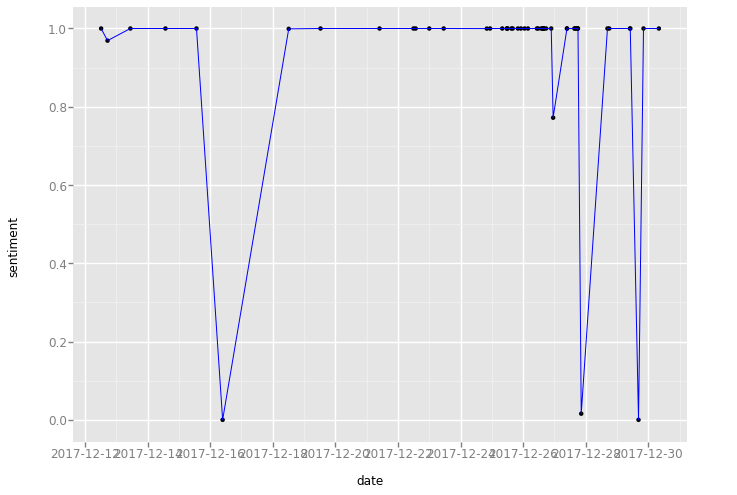

<ggplot: (-9223371863295061125)>

In [91]:
ggplot(aes(x="date",y="sentiment"),data=jr) + geom_point() + geom_line(color = 'blue') + scale_x_date(labels = date_format("%Y-%m-%d"))

In [92]:
jr.sort_values(['sentiment'])[:1]  #python 3

,From,title,comments,date,sentiment
48,静如水波,江歌案：刘鑫的有些证词和行为是经不住推敲的,1.刘鑫知道陈世峰下午已经来堵过门了，晚上又发恐吓信息给刘鑫，刘鑫就是为了怕遇到陈世峰才让江...,2017-12-29 16:31:00,0.0


In [93]:
print(jr.sort_values(['sentiment']).iloc[0].comments)

1.刘鑫知道陈世峰下午已经来堵过门了，晚上又发恐吓信息给刘鑫，刘鑫就是为了怕遇到陈世峰才让江歌在车站等她一起回家。按常理这个时候，刘鑫不会一个人先进门，万一门口遇到陈世峰了呢，这个机率是很大的。况且刘鑫是有预见性的，所以才让江歌陪一起回家。尤其是刘鑫到家楼下的时候，最顾虑的一定是在想陈世峰是不是在门口，而不是先换衣服。
2.听见外面的参加声以后，刘鑫试图开门。但据她供述：被一股力量挡了回来。自此以后直到日本警方来，一个多小时的时间里，除了打过两次报警电话，一直在房间里坐着。。难当不是想出去看看究竟吗？俩人一起回家的，你又听到外面有声音。
3.关于报警电话中：把门锁了，不要骂了。刘鑫在开庭中强调当时的话是：怎么把门锁了，不要闹了。因为这是开头的第一句话，她可能是在和门外的人说话，所以报警录音没有录全。真假不知，但在庭上刘鑫是这么说的。
4.关键点：刘鑫有没有锁门？报警电话录下来的录音，警察问有没有锁门。刘鑫回答：是的，锁着， 但我姐姐在门外。这种事符合常理，人在危险的情况下保护自己是下意识的选择，如果警方在知道这种情况下，也会让你锁门，不会让你出去冒险搏斗。但是刘鑫在局面中回答江歌母亲：阿姨，我没有锁门，真的没有锁门。
5.门铃声。警方的报警电话录音中，能清晰的听到门外又按门铃的声音。刘鑫却说没听到，后来改口：哪天外面下了雨，我以为是雨水敲打的声音。
6.二次报警。刘鑫突然慌张起来，手机屏幕被什么点到了发出了声音，而且她也突然提高声音，慌乱急促，说姐姐危险。如果没有看到什么，没有听到什么，或者没有收到惊吓，谁会突然突然增高嗓门呢？尤其是在报警电话的时候。
7.救护车。刘鑫自己没打电话叫救护车，而是在报警中让警方通知救护车。
说刘鑫没看到什么，没听到什么。怕是不符合实际。
因为她说她是推测江歌发生了什么，才打报警电话的。
并且推测是江歌在门外遭遇了伤害。
